2NN does not deal with degeneracies, and it deal poorly with near degeneracies. 
In this notebook we, try to mitigate this issue

In [1]:
from utils import *
import pandas as pd
import seaborn as sns

In [ ]:
L = 12
num_seeds=20

In [8]:
L = 12
W = 3.5

D = [[],[],[],[]]

EPS = [0.00,0.01,0.10,0.30]
num_seeds=20
for index, eps in enumerate(EPS):
    for seed in tqdm(range(num_seeds)):
        H = constructHamiltonian(L=L, W=W, seed=seed, t=.1)
        vals, vecs = diag(H)
        d = nn2(vecs, plot=False, return_xy=False, eps=eps)
        D[index].append(d)



100%|██████████| 20/20 [20:40<00:00, 62.02s/it]


In [9]:
df = pd.DataFrame(data=np.vstack((np.array(D).flatten(), sorted(EPS*num_seeds))) ).T
df.columns = ['Intrisic Dimension', 'epsilon']

df.to_csv('df_w35.csv')

In [11]:
df_w1 = pd.read_csv('df_w1.csv', index_col=0)
df_w35 = pd.read_csv('df_w35.csv', index_col=0)
df_w7 = pd.read_csv('df_w7.csv', index_col=0)

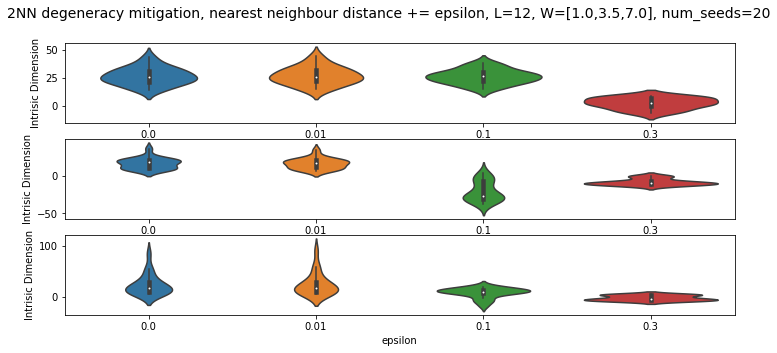

In [12]:
fig, ax = plt.subplots(3,1,figsize=(12,5))
sns.violinplot(x='epsilon', y='Intrisic Dimension', data=df_w1, ax=ax[0])
sns.violinplot(x='epsilon', y='Intrisic Dimension', data=df_w35, ax=ax[1])
sns.violinplot(x='epsilon', y='Intrisic Dimension', data=df_w7, ax=ax[2])
fig.suptitle('2NN degeneracy mitigation, nearest neighbour distance += epsilon, L={}, W=[1.0,3.5,7.0], num_seeds={}'.format(L,num_seeds),
         fontsize=14)
plt.savefig('figures/2NN_degeneracy_mitigation.png', dpi=420, bbox_inches='tight')
plt.show()

TypeError: nn2() got an unexpected keyword argument 'del_vals_larger_than'

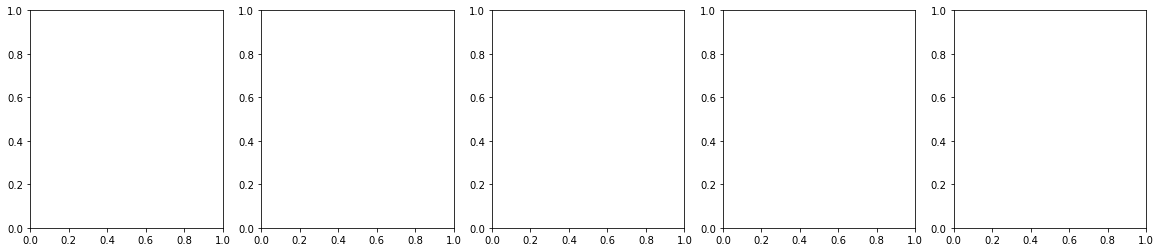

In [2]:
EPS = [0.00,0.01,0.10,0.30,1.00]
L=8
W = 1
fig, ax = plt.subplots(1,len(EPS),figsize=(20,4))
H = constructHamiltonian(L=L, W=W, seed=0, t=.1)
vals, vecs = diag(H)
for index, eps in enumerate(EPS):
    x,y,d = nn2(vecs, plot=False, return_xy=True, eps=eps, xshift=False, del_vals_larger_than=1)
    ax[index].scatter(x,y, label='Data, $\epsilon=${}'.format(eps))
    ax[index].plot(x,x*d, label='D={}'.format(d))
    ax[index].legend()
plt.savefig('figures/2NN_degeneracy_mitigation_1.png', dpi=420, bbox_inches='tight')
plt.show()

[53 64 65  7 61 54 13 38 32  6 37  0 17 25 15 22 30 59 62 26 29 50 66  8
 19 67 31 16 47 56 33 44 14 23 49 48 57 36 40  1 27 55 35  2 21  4 10 46
 34 42 41 60 20 68 28  9 24  5 63 43 39 45  3 12 11 18 58 52 51]
[51]
[53 64 65  7 61 54 13 38 32  6 37  0 17 25 15 22 30 59 62 26 29 50 66  8
 19 67 31 16 47 56 33 44 14 23 49 48 57 36 40  1 27 55 35  2 21  4 10 46
 34 42 41 60 20 68 28  9 24  5 63 43 39 45  3 12 11 18 58 52 51]
[52 51]
[53 64 65  7 61 54 13 38 32  6 37  0 17 25 15 22 30 59 62 26 29 50 66  8
 19 67 31 16 47 56 33 44 14 23 49 48 57 36 40  1 27 55 35  2 21  4 10 46
 34 42 41 60 20 68 28  9 24  5 63 43 39 45  3 12 11 18 58 52 51]
[58 52 51]
[53 64 65  7 61 54 13 38 32  6 37  0 17 25 15 22 30 59 62 26 29 50 66  8
 19 67 31 16 47 56 33 44 14 23 49 48 57 36 40  1 27 55 35  2 21  4 10 46
 34 42 41 60 20 68 28  9 24  5 63 43 39 45  3 12 11 18 58 52 51]
[11 18 58 52 51]
[53 64 65  7 61 54 13 38 32  6 37  0 17 25 15 22 30 59 62 26 29 50 66  8
 19 67 31 16 47 56 33 44 14 23 49 48 57 36

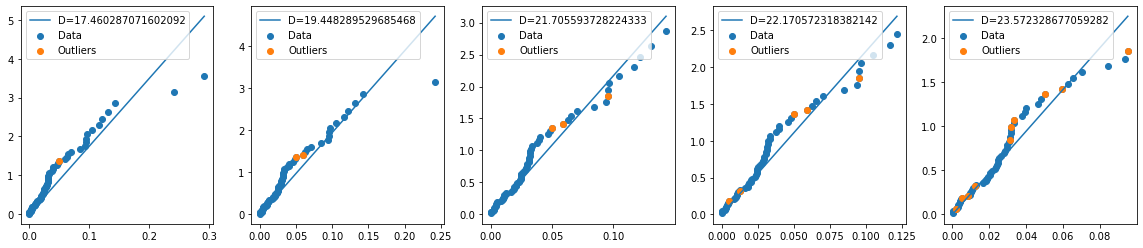

In [2]:
V = [1,2,3,5,10]
L=8
W = 1
fig, ax = plt.subplots(1,len(V),figsize=(20,4))
H = constructHamiltonian(L=L, W=W, seed=0, t=.1)
vals, vecs = diag(H)
for index, del_vals in enumerate(V):
    x,y,d,x2,y2 = nn2(vecs, plot=False, return_xy=True, eps=0, xshift=False, del_vals=del_vals)
    ax[index].scatter(x,y, label='Data')
    ax[index].scatter(x2,y2, label='Outliers')
    ax[index].plot(x,x*d, label='D={}'.format(d))
    ax[index].legend()
plt.savefig('figures/2NN_degeneracy_mitigation_1.png', dpi=420, bbox_inches='tight')
plt.show()